In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats 

 the Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index the target 
 so in our case study we will apply linear regression models to under cover the factors that determines the academic performance by analysing the relation between this predictors and finding trends and linear relation

# 1-cleaning and preparing the data set 

In [18]:
df = pd.read_csv("Student_Performance.csv")

In [20]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [21]:
df = pd.get_dummies(df,columns=["Extracurricular Activities"], drop_first=True, dtype=int)

In [22]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


In [70]:
df.isnull().sum()

H_study                           0
Previous Scores                   0
Sleep Hours                       0
SQuetion_Papers_practiced         0
Performance Index                 0
Extracurricular Activities_Yes    0
dtype: int64

In [71]:
df.head()

,H_study,Previous Scores,Sleep Hours,SQuetion_Papers_practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


In [72]:
df.dtypes

H_study                             int64
Previous Scores                     int64
Sleep Hours                         int64
SQuetion_Papers_practiced           int64
Performance Index                 float64
Extracurricular Activities_Yes      int32
dtype: object

In [73]:
df.notnull().sum()

H_study                           10000
Previous Scores                   10000
Sleep Hours                       10000
SQuetion_Papers_practiced         10000
Performance Index                 10000
Extracurricular Activities_Yes    10000
dtype: int64

In [74]:
df.columns

Index(['H_study', 'Previous Scores', 'Sleep Hours',
       'SQuetion_Papers_practiced', 'Performance Index',
       'Extracurricular Activities_Yes'],
      dtype='object')

In [25]:
df.rename(columns={"Hours Studied" :"H_study"},inplace=True)
df.rename(columns={"Extracurricular Activities":"exta_activites"},inplace=True)
df.rename(columns={"Sample Question Papers Practiced":"SQuetion_Papers_practiced"},inplace=True)

In [ ]:
df.columns

# 2-understanding the relation between the quantitive varibles and the target variable

In [26]:
df.corr()

,H_study,Previous Scores,Sleep Hours,SQuetion_Papers_practiced,Performance Index,Extracurricular Activities_Yes
H_study,1.000000,-0.012390,0.001245,0.017463,0.373730,0.003873
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189,0.008369
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106,-0.023284
SQuetion_Papers_practiced,0.017463,0.007888,0.003990,1.000000,0.043268,0.013103
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000,0.024525
Extracurricular Activities_Yes,0.003873,0.008369,-0.023284,0.013103,0.024525,1.000000


(0.0, 104.5)

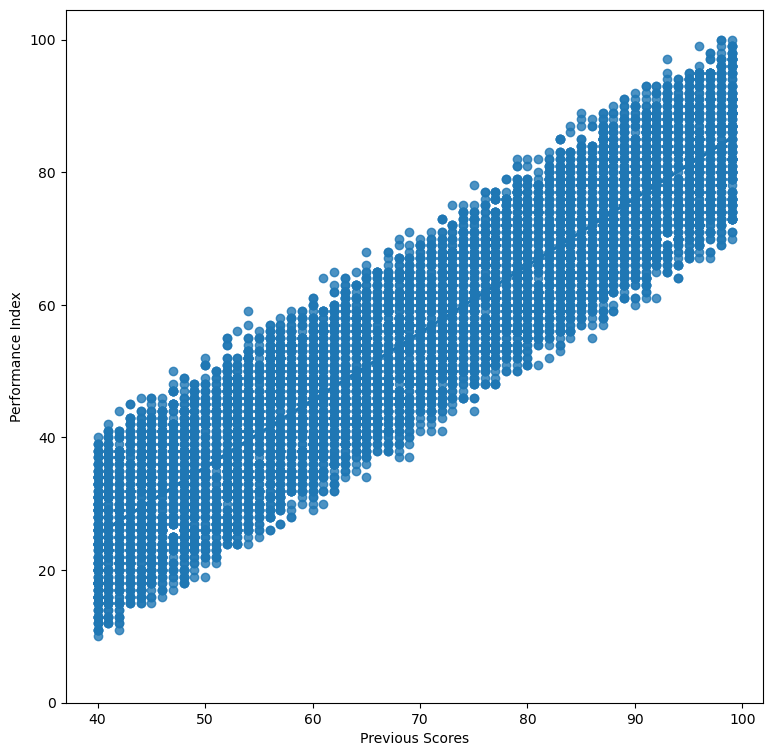

In [28]:
plt.figure(figsize=(9, 9))
sns.regplot(x = "Previous Scores" , y = "Performance Index",data = df)
plt.ylim(0.)

(0.0, 104.5)

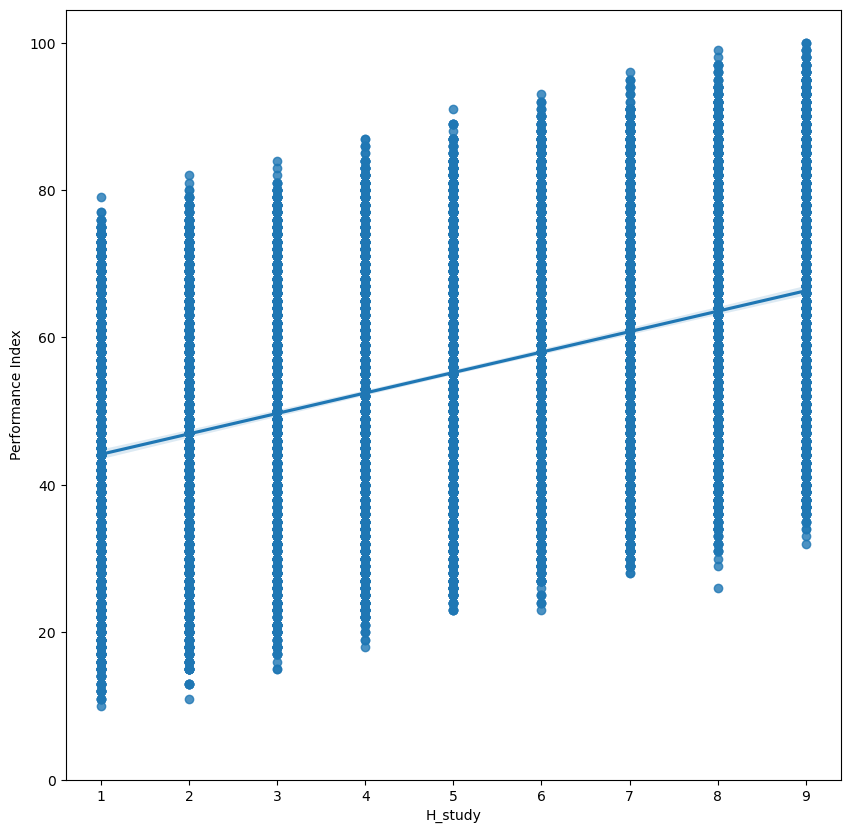

In [29]:
plt.figure(figsize=(10,10))
sns.regplot(x ="H_study" ,y = "Performance Index" , data = df )
plt.ylim(0.)

In [30]:
pearson_coef,p_value = stats.pearsonr(df['H_study'],df['Performance Index'])
print("the pearson coeficient is ",pearson_coef ,"and the p-value is " , p_value)

the pearson coeficient is  0.37373035069872373 and the p-value is  0.0


as we can see they is a moderate linear relationship btw the ['H_study'] ,['Performance Index'] r=0.4 , r~0.5 with a p_value of 0 which means the positif linear relationship is statistcaly significant 

In [31]:
pearson_coef,p_value = stats.pearsonr(df["Previous Scores"] , df["Performance Index"])
print("the pearson coeficient is ",pearson_coef ,"and the p-value is " , p_value)

the pearson coeficient is  0.9151891412264472 and the p-value is  0.0


as we can see they is a very strong linear relationship btw the ["Previous Scores"] ,['Performance Index'] r=0.9 , r~1 with a p_value of 0 which means the positif linear relationship is statistcaly significant 

# Linear regression 

In [24]:
# multiple  linear regression 
LM = LinearRegression()
LM

LinearRegression()

In [32]:
Z = df[["H_study","Previous Scores"]]
Y = df["Performance Index"]

In [33]:
LM.fit(Z,Y)

LinearRegression()

In [35]:
LM.intercept_

-29.81678986038571

In [36]:
LM.coef_

array([2.85763725, 1.01912275])

Yhat = -29.81678986038571 + (["H_study"]*2.85763725) + (["Previous Scores"]*1.01912275)

In [40]:
Yhat = LM.predict(Z)
Yhat[0:10]

array([91.07982325, 65.18182474, 45.01956842, 37.46577944, 66.62087721,
       58.24769649, 64.58263171, 38.90483192, 62.94384823, 72.315684  ])

# Model evaluation 

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
MSE = mean_squared_error(df["Performance Index"] , Yhat)
MSE

5.214282868789693

# R^2

In [46]:
R_2 = LM.score(Z,Y)
R_2

0.9858724242382322

we can say that 98%  of the variation of the Performance Index is explained by the two independents variables Previous Scores and the H_study 

C:\Users\ayman\AppData\Local\Temp\ipykernel_18448\4038708358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df["Performance Index"], hist = False , color = "r" , label = "actual value ")
C:\Users\ayman\AppData\Local\Temp\ipykernel_18448\4038708358.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

<Axes: xlabel='Performance Index', ylabel='Density'>

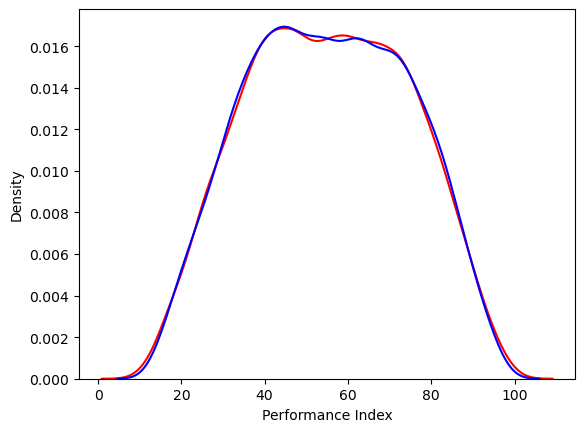

In [54]:
ax1 = sns.distplot(df["Performance Index"], hist = False , color = "r" , label = "actual value ")
sns.distplot(Yhat , hist = False , color = "b" , label = "predicted values" , ax = ax1)


the distribution plot show us the fit of the predicted value and the actual value of the target variable  that fit our model in a accurate way 


Text(0.5, 1.0, 'actual values vs predicted values')

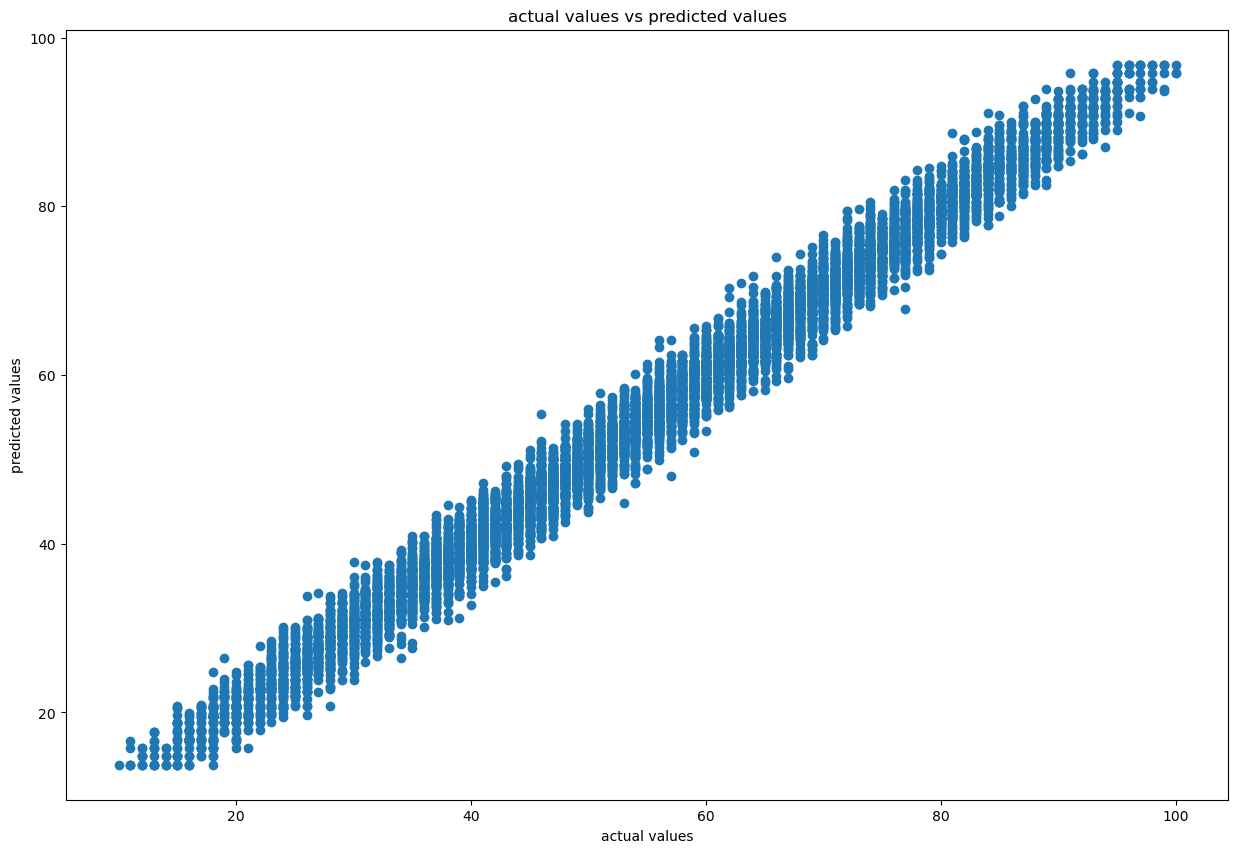

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y , Yhat )
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("actual values vs predicted values")


# Value prediction

In [64]:
predicted_data = pd.DataFrame({"actual value":Y , "predicted values" :Yhat , "diff" : Y - Yhat})
predicted_data.head(10)


,actual value,predicted values,diff
0,91.0,91.079823,-0.079823
1,65.0,65.181825,-0.181825
2,45.0,45.019568,-0.019568
3,36.0,37.465779,-1.465779
4,66.0,66.620877,-0.620877
5,61.0,58.247696,2.752304
6,63.0,64.582632,-1.582632
7,42.0,38.904832,3.095168
8,61.0,62.943848,-1.943848
9,69.0,72.315684,-3.315684


In [69]:
LM.predict([[9,99]])

C:\Users\ayman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([96.79509774])